# Graph DataStructure
https://www.geeksforgeeks.org/graph-data-structure-and-algorithms/

A graph is a data structure that consists of the following two components:<br> 
1. A finite set of vertices also called as nodes. <br>
2. A finite set of ordered pair of the form (u, v) called as edge. The pair is ordered because (u, v) is not the same as (v, u) in case of a directed graph(di-graph). The pair of the form (u, v) indicates that there is an edge from vertex u to vertex v. The edges may contain weight/value/cost.

The following two are the most commonly used representations of a graph.<br> 
1. Adjacency Matrix <br>
2. Adjacency List<br>

## Adjacency Matrix
Adjacency Matrix is a 2D array of size V x V where V is the number of vertices in a graph. Let the 2D array be adj[][], a slot adj[i][j] = 1 indicates that there is an edge from vertex i to vertex j. Adjacency matrix for undirected graph is always symmetric. Adjacency Matrix is also used to represent weighted graphs. If adj[i][j] = w, then there is an edge from vertex i to vertex j with weight w.

<b>Pros:</b> Representation is easier to implement and follow. Removing an edge takes O(1) time. Queries like whether there is an edge from vertex ‘u’ to vertex ‘v’ are efficient and can be done O(1).<br>
<b>Cons:</b> Consumes more space O(V^2). Even if the graph is sparse(contains less number of edges), it consumes the same space. Adding a vertex is O(V^2) time.

In [1]:
class Graph:
    def __init__(self, numvertex):
        self.adjMatrix = [[-1]*numvertex for x in range(numvertex)]
        self.numvertex = numvertex
        self.vertices = {}
        self.verticeslist = [0]*numvertex
        
    def set_vertex(self, vtx, idx):
        if 0 <= vtx <= self.numvertex:
            self.vertices[idx] = vtx
            self.verticeslist[vtx] = idx
    
    def set_edge(self, frm, to, cost=0):
        frm = self.vertices[frm]
        to = self.vertices[to]
        self.adjMatrix[frm][to] = cost
        # for directed graph do not add this
        self.adjMatrix[to][frm] = cost
    
    def get_vertex(self):
        return self.verticeslist
    
    def get_edges(self):
        edges = []
        for i in range(self.numvertex):
            for j in range(self.numvertex):
                if self.adjMatrix[i][j] != -1:
                    edges.append((self.verticeslist[i],self.verticeslist[j],self.adjMatrix[i][j]))
        return edges
    
    def get_matrix(self):
        return self.adjMatrix

In [2]:
G = Graph(6)
G.set_vertex(0,'a')
G.set_vertex(1,'b')
G.set_vertex(2,'c')
G.set_vertex(3,'d')
G.set_vertex(4,'e')
G.set_vertex(5,'f')
G.set_edge('a','e',10)
G.set_edge('a','c',20)
G.set_edge('c','b',30)
G.set_edge('b','e',40)
G.set_edge('e','d',50)
G.set_edge('f','e',60)
print("Vertices of Graph")
print(G.get_vertex())
print("Edges of Graph")
print(G.get_edges())
print("Adjacency Matrix of Graph")
print(G.get_matrix())

Vertices of Graph
['a', 'b', 'c', 'd', 'e', 'f']
Edges of Graph
[('a', 'c', 20), ('a', 'e', 10), ('b', 'c', 30), ('b', 'e', 40), ('c', 'a', 20), ('c', 'b', 30), ('d', 'e', 50), ('e', 'a', 10), ('e', 'b', 40), ('e', 'd', 50), ('e', 'f', 60), ('f', 'e', 60)]
Adjacency Matrix of Graph
[[-1, -1, 20, -1, 10, -1], [-1, -1, 30, -1, 40, -1], [20, 30, -1, -1, -1, -1], [-1, -1, -1, -1, 50, -1], [10, 40, -1, 50, -1, 60], [-1, -1, -1, -1, 60, -1]]


## Adjacency List

An array of lists is used. The size of the array is equal to the number of vertices. Let the array be an array[]. An entry array[i] represents the list of vertices adjacent to the ith vertex. This representation can also be used to represent a weighted graph. The weights of edges can be represented as lists of pairs. Following is the adjacency list representation of the above graph.

<b>Pros:</b> Saves space O(|V|+|E|) . In the worst case, there can be C(V, 2) number of edges in a graph thus consuming O(V^2) space. Adding a vertex is easier.<br>
<b>Cons:</b> Queries like whether there is an edge from vertex u to vertex v are not efficient and can be done O(V).

In [3]:
class AdjNode:
    def __init__(self, data):
        self.vertex = data
        self.next = None

In [4]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [None]*self.V
    
    def add_edge(self, src, dest):
        # Adding the node to the source node
        node = AdjNode(dest)
        node.next = self.graph[src]
        self.graph[src] = node
        
        # Adding the source node to the destination as it is unidirected graph
        node = AdjNode(src)
        node.next = self.graph[dest]
        self.graph[dest] = node
    
    def print_graph(self):
        for i in range(self.V):
            print("Adjacency list of vertex {}\n head".format(i), end="")
            temp = self.graph[i]
            while temp:
                print(" -> {}".format(temp.vertex), end="")
                temp = temp.next
            print(" \n")

In [5]:
V = 5
graph = Graph(V)
graph.add_edge(0, 1)
graph.add_edge(0, 4)
graph.add_edge(1, 2)
graph.add_edge(1, 3)
graph.add_edge(1, 4)
graph.add_edge(2, 3)
graph.add_edge(3, 4)

graph.print_graph()

Adjacency list of vertex 0
 head -> 4 -> 1 

Adjacency list of vertex 1
 head -> 4 -> 3 -> 2 -> 0 

Adjacency list of vertex 2
 head -> 3 -> 1 

Adjacency list of vertex 3
 head -> 4 -> 2 -> 1 

Adjacency list of vertex 4
 head -> 3 -> 1 -> 0 



## Breadth First Search or BFS for a Graph

Breadth-First Traversal (or Search) for a graph is similar to Breadth-First Traversal of a tree (Level order traversal). The only catch here is, unlike trees, graphs may contain cycles, so we may come to the same node again. To avoid processing a node more than once, we use a boolean visited array. For simplicity, it is assumed that all vertices are reachable from the starting vertex. 

For example, in the following graph, we start traversal from vertex 2. When we come to vertex 0, we look for all adjacent vertices of it. 2 is also an adjacent vertex of 0. If we don’t mark visited vertices, then 2 will be processed again and it will become a non-terminating process. A Breadth-First Traversal of the following graph is 2, 0, 3, 1.

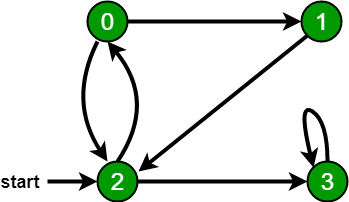

The implementation uses an adjacency list representation of graphs

<b>Time Complexity:</b> O(V+E) where V is a number of vertices in the graph and E is a number of edges in the graph.

<b>Note that the below code traverses only the vertices reachable from a given source vertex. All the vertices may not be reachable from a given vertex (for example Disconnected graph). To print all the vertices, we can modify the BFS function to do traversal starting from all nodes one by one (Like the DFS modified version).</b>

https://www.geeksforgeeks.org/applications-of-breadth-first-traversal/

In [1]:
from collections import defaultdict

class Graph:
    def __init__(self):
        self.graph = defaultdict(list)
    
    def addEdge(self, u, v):
        self.graph[u].append(v)
    
    def BFS(self, s):
        visited = [False]*(max(self.graph)+ 1)
        queue = []
        
        # Mark the source node as
        # visited and enqueue it
        queue.append(s)
        visited[s] = True
        
        while queue:
            # Deque a vertex from queue and print it
            s = queue.pop(0)
            print(s, end = " ")
            
            # Get all adjacent vertices of the
            # dequeued vertex s. If a adjacent
            # has not been visited, then mark it
            # visited and enqueue it
            for i in self.graph[s]:
                if visited[i] == False:
                    queue.append(i)
                    visited[i] = True

In [2]:
g = Graph()
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 2)
g.addEdge(2, 0)
g.addEdge(2, 3)
g.addEdge(3, 3)
 
print ("Following is Breadth First Traversal"
                  " (starting from vertex 2)")
g.BFS(2)

Following is Breadth First Traversal (starting from vertex 2)
2 0 3 1 

## Depth First Search or DFS for a Graph
Depth First Traversal (or Search) for a graph is similar to Depth First Traversal of a tree. The only catch here is, unlike trees, graphs may contain cycles (a node may be visited twice). To avoid processing a node more than once, use a boolean visited array. 

Depth-first search is an algorithm for traversing or searching tree or graph data structures. The algorithm starts at the root node (selecting some arbitrary node as the root node in the case of a graph) and explores as far as possible along each branch before backtracking. So the basic idea is to start from the root or any arbitrary node and mark the node and move to the adjacent unmarked node and continue this loop until there is no unmarked adjacent node. Then backtrack and check for other unmarked nodes and traverse them. Finally, print the nodes in the path.

<b>Algorithm:</b><br>
Create a recursive function that takes the index of the node and a visited array.

Mark the current node as visited and print the node.<br>
Traverse all the adjacent and unmarked nodes and call the recursive function with the index of the adjacent node.

<b>Complexity Analysis:</b><br>
Time complexity: O(V + E), where V is the number of vertices and E is the number of edges in the graph.<br>
Space Complexity: O(V), since an extra visited array of size V is required.

https://www.geeksforgeeks.org/applications-of-depth-first-search/

In [3]:
from collections import defaultdict

class Graph:
    def __init__(self):
        self.graph = defaultdict(list)
    
    def addEdge(self, u, v):
        self.graph[u].append(v)
    
    def DFSUtil(self,v, visited):
        # Mark the current node as visited
        # and print it
        visited.add(v)
        print(v, end=' ')
        
        # Recur for all the vertices
        # adjacent to this vertex
        for neighbour in self.graph[v]:
            if neighbour not in visited:
                self.DFSUtil(neighbour, visited)
    
    def DFS(self, v):      
        # Create a set to store visited vertices
        visited = set()       
        
        # Call the recursive helper function
        # to print DFS traversal
        self.DFSUtil(v, visited)        

In [4]:
g = Graph()
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 2)
g.addEdge(2, 0)
g.addEdge(2, 3)
g.addEdge(3, 3)

print("Following is DFS from (starting from vertex 2)")
g.DFS(2)

Following is DFS from (starting from vertex 2)
2 0 1 3 

## DFS on Disconnected Graph
This will happen by handling a corner case. 
The above code traverses only the vertices reachable from a given source vertex. All the vertices may not be reachable from a given vertex, as in a Disconnected graph. To do a complete DFS traversal of such graphs, run DFS from all unvisited nodes after a DFS. 

<b>Algorithm:</b> <br>
Create a recursive function that takes the index of the node and a visited array.<br>
Mark the current node as visited and print the node.<br>
Traverse all the adjacent and unmarked nodes and call the recursive function with the index of the adjacent node.<br>
Run a loop from 0 to the number of vertices and check if the node is unvisited in the previous DFS, call the recursive function with the current node.

<b>Complexity Analysis:</b><br>
Time complexity: O(V + E), where V is the number of vertices and E is the number of edges in the graph.<br>
Space Complexity: O(V), since an extra visited array of size V is required.

In [10]:
from collections import defaultdict

class Graph:
    def __init__(self):
        self.graph = defaultdict(list)
    
    def addEdge(self, u, v):
        self.graph[u].append(v)
    
    def DFSUtil(self, v, visited):
        # Mark the current node as visited and print it
        visited.add(v)
        print(v)
        
        # recur for all the vertices adjacent to this vertex
        for neighbour in self.graph[v]:
            if neighbour not in visited:
                self.DFSUtil(neighbour, visited)
    
    def DFS(self):
        # create a set to store all visited vertices
        visited = set()
        # call the recursive helper function to print DFS traversal 
        #starting from all
        # vertices one by one
        for vertex in self.graph:
            if vertex not in visited:
                self.DFSUtil(vertex, visited)       

In [11]:
g = Graph()
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 2)
g.addEdge(2, 0)
g.addEdge(2, 3)
g.addEdge(3, 3)
g.DFS()

0
1
2
3


## Shortest path in an unweighted graph

Given an unweighted graph, a source, and a destination, we need to find the shortest path from source to destination in the graph in the most optimal way.
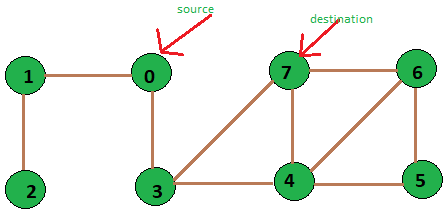
Input: source vertex = 0 and destination vertex is = 7.<br>
Output: Shortest path length is:2<br>
        Path is::
        0 3 7

Input: source vertex is = 2 and destination vertex is = 6.<br>
Output: Shortest path length is:5<br>
        Path is::
        2 1 0 3 4 6
        
One solution is to solve in O(VE) time using Bellman–Ford. If there are no negative weight cycles, then we can solve in O(E + VLogV) time using Dijkstra’s algorithm.

Since the graph is unweighted, we can solve this problem in O(V + E) time. The idea is to use a modified version of Breadth-first search in which we keep storing the predecessor of a given vertex while doing the breadth-first search. 
We first initialize an array dist[0, 1, …., v-1] such that dist[i] stores the distance of vertex i from the source vertex and array pred[0, 1, ….., v-1] such that pred[i] represents the immediate predecessor of the vertex i in the breadth-first search starting from the source. 
Now we get the length of the path from source to any other vertex in O(1) time from array d, and for printing the path from source to any vertex we can use array p and that will take O(V) time in worst case as V is the size of array P. So most of the time of the algorithm is spent in doing the Breadth-first search from a given source which we know takes O(V+E) time. Thus the time complexity of our algorithm is O(V+E). 

<b>Time Complexity : O(V + E)<br> 
Auxiliary Space: O(V)</b>

In [13]:
def add_edge(adj, src, dest):
    adj[src].append(dest)
    adj[dest].append(src)

# a modified version of BFS that stores predecessor
# of each vertex in array p
# and its distance from source in array d
def BFS(adj, src, dest, v, pred, dist):
    queue = []
    visited = [False for i in range(v)]
    # as no path is yet constructed
    # dist[i] for all i set to infinity
    for i in range(v):
        dist[i] = 1000000
        pred[i] = -1
    # now source is first to be visited and
    # distance from source to itself should be 0
    visited[src] = True
    dist[src] = 0
    queue.append(src)
    
    # Standard BFS algorithm
    while len(queue)!=0:
        u = queue[0]
        queue.pop(0)
        for i in range(len(adj[u])):
            if visited[adj[u][i]] == False:
                visited[adj[u][i]] = True
                dist[adj[u][i]] = dist[u] + 1
                pred[adj[u][i]] = u
                queue.append(adj[u][i])
                
                if adj[u][i] == dest:
                    return True
    
    return False

def printShortestDistance(adj, s, dest, v):
    # predecessor[i] array stores predecessor of
    # i and distance array stores distance of i
    # from s
    pred = [0 for i in range(v)]
    dist = [0 for i in range(v)]
    
    if BFS(adj, s, dest, v, pred, dist) == False:
        print("Given source and destination are not connected")
    path = []
    crawl = dest
    path.append(crawl)
    
    while pred[crawl] != -1:
        path.append(pred[crawl])
        crawl = pred[crawl]
    
    # distance from source is in distance array
    print("Shortest path length is : " + str(dist[dest]), end = '')
    
    # printing path from source to destination
    print("\nPath is : : ")
     
    for i in range(len(path)-1, -1, -1):
        print(path[i], end=' ')

In [14]:
# no. of vertices
v = 8

# array of vectors is used to store the graph
# in the form of an adjacency list
adj = [[] for i in range(v)]

# Creating graph given in the above diagram.
# add_edge function takes adjacency list, source
# and destination vertex as argument and forms
# an edge between them.
add_edge(adj, 0, 1)
add_edge(adj, 0, 3)
add_edge(adj, 1, 2)
add_edge(adj, 3, 4)
add_edge(adj, 3, 7)
add_edge(adj, 4, 5)
add_edge(adj, 4, 6)
add_edge(adj, 4, 7)
add_edge(adj, 5, 6)
add_edge(adj, 6, 7)
source = 0
dest = 7
printShortestDistance(adj, source, dest, v)

Shortest path length is : 2
Path is : : 
0 3 7 

## Detect cycle in an undirected graph

Given an undirected graph, how to check if there is a cycle in the graph?<br>
Input: n = 4, e = 4 <br>
Output: Yes <br>
Explanation: <br>
0 1, 1 2, 2 3, 0 2 <br> 
Diagram: 
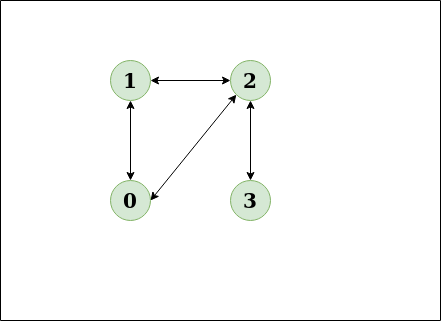
The diagram clearly shows a cycle 0 to 2 to 1 to 0

Input:n = 4, e = 3 <br>
0 1, 1 2, 2 3 <br>
Output:No <br>
Explanation: <br>
Diagram:<br>
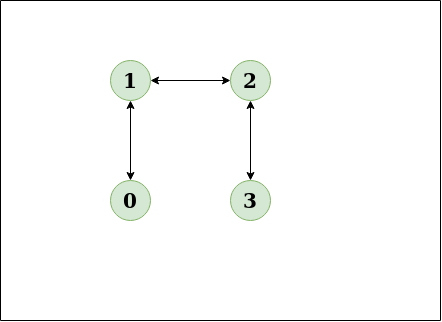
The diagram clearly shows no cycle 

<b>Approach:</b><br> 
Run a DFS from every unvisited node. Depth First Traversal can be used to detect a cycle in a Graph. DFS for a connected graph produces a tree. There is a cycle in a graph only if there is a back edge present in the graph. A back edge is an edge that is joining a node to itself (self-loop) or one of its ancestor in the tree produced by DFS. 
To find the back edge to any of its ancestors keep a visited array and if there is a back edge to any visited node then there is a loop and return true.

<b>Algorithm:</b><br> 
1. Create the graph using the given number of edges and vertices.
2. Create a recursive function that have current index or vertex, visited array and parent node.
3. Mark the current node as visited .
4. Find all the vertices which are not visited and are adjacent to the current node. Recursively call the function for those vertices, If the recursive function returns true.
5. If the adjacent node is not parent and already visited then return true.
6. Create a wrapper class, that calls the recursive function for all the vertices and if any function returns true, return true.
7. Else if for all vertices the function returns false return false.

<b>Dry Run:</b>
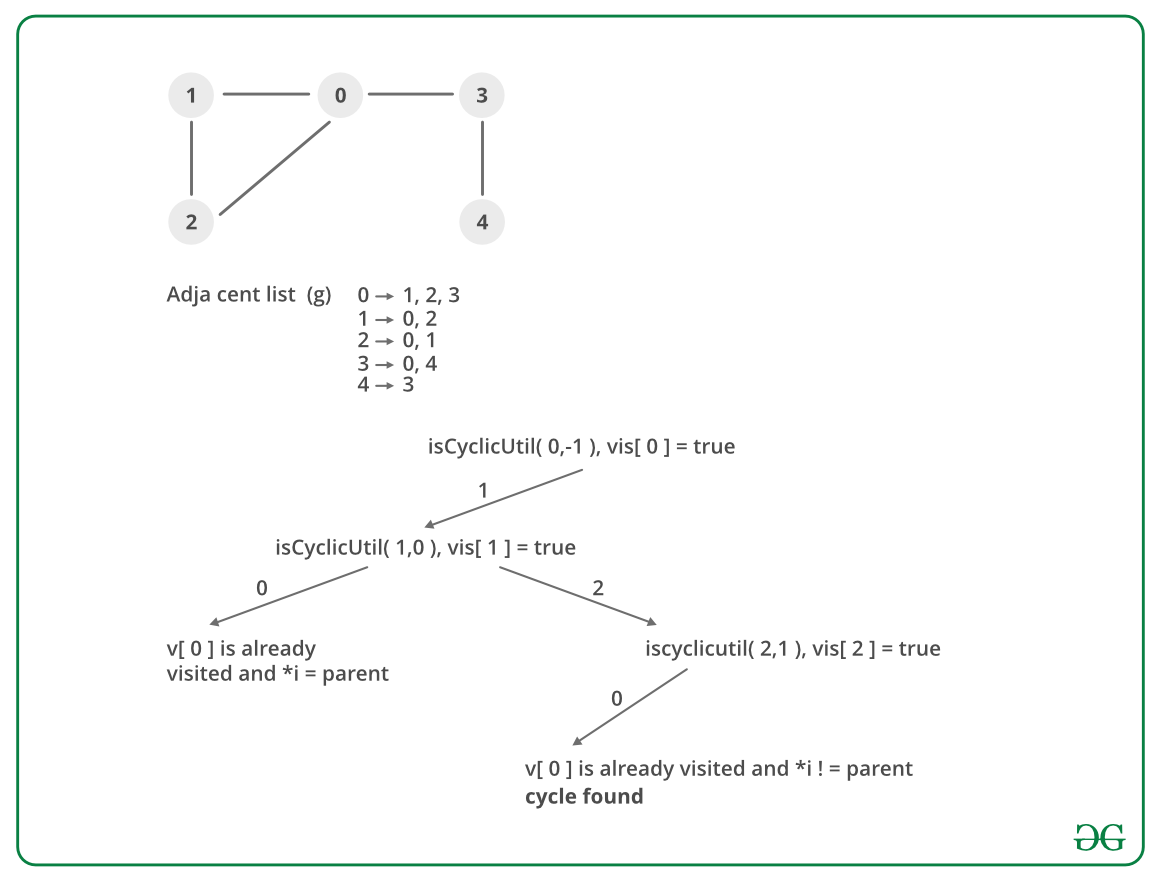

<b>Complexity Analysis:</b> 

Time Complexity: O(V+E).<br> 
The program does a simple DFS Traversal of the graph which is represented using adjacency list. So the time complexity is O(V+E).<br>
Space Complexity: O(V).<br> 
To store the visited array O(V) space is required.

In [1]:
from collections import defaultdict

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = defaultdict(list)
    
    def addEdge(self,v,w):
        self.graph[v].append(w)
        self.graph[w].append(v)
    
    # A recursive function that uses 
    # visited[] and parent to detect
    # cycle in subgraph reachable from vertex v.
    def isCyclicUtil(self,v,visited,parent):
        # Mark the current node as visited
        visited[v] = True
        # Recur for all the vertices 
        # adjacent to this vertex
        for i in self.graph[v]:
            # If the node is not 
            # visited then recurse on it
            if visited[i]==False:
                if self.isCyclicUtil(i,visited,v):
                    return True
            # If an adjacent vertex is 
            # visited and not parent 
            # of current vertex,
            # then there is a cycle
            elif parent != i:
                return True
        
        return False
    
    def isCyclic(self):
        # Mark all the vertices 
        # as not visited
        visited = [False]*(self.V)
        # Call the recursive helper 
        # function to detect cycle in different
        # DFS trees
        for i in range(self.V):
            # Don't recur for u if it 
            # is already visited
            if visited[i] == False:
                if self.isCyclicUtil(i, visited, -1) == True:
                    return True
        
        return False

In [2]:
g = Graph(5)
g.addEdge(1, 0)
g.addEdge(1, 2)
g.addEdge(2, 0)
g.addEdge(0, 3)
g.addEdge(3, 4)
  
if g.isCyclic():
    print("Graph contains cycle")
else :
    print("Graph does not contain cycle")

g1 = Graph(3)
g1.addEdge(0,1)
g1.addEdge(1,2)
  
if g1.isCyclic():
    print("Graph contains cycle")
else :
    print("Graph does not contain cycle")

Graph contains cycle
Graph does not contain cycle


## Detect Cycle in a Directed Graph

Given a directed graph, check whether the graph contains a cycle or not. Your function should return true if the given graph contains at least one cycle, else return false.

Input: n = 4, e = 6<br>
0 -> 1, 0 -> 2, 1 -> 2, 2 -> 0, 2 -> 3, 3 -> 3<br>
Output: Yes<br>
Explanation:<br>
Diagram:
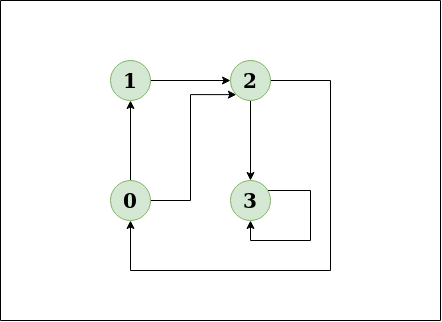
The diagram clearly shows a cycle 0 -> 2 -> 0

Input:n = 4, e = 4<br>
0 -> 1, 0 -> 2, 1 -> 2, 2 -> 3<br>
Output:No<br>
Explanation:<br>
Diagram:
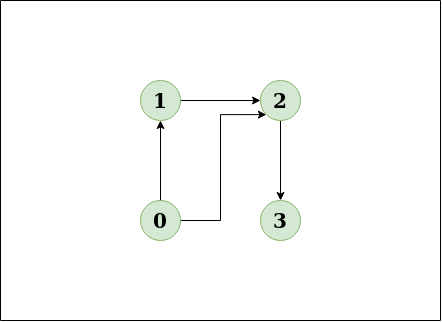
The diagram clearly shows no cycle

<b>Approach:</b><br> Depth First Traversal can be used to detect a cycle in a Graph. DFS for a connected graph produces a tree. There is a cycle in a graph only if there is a back edge present in the graph. A back edge is an edge that is from a node to itself (self-loop) or one of its ancestors in the tree produced by DFS. In the following graph, there are 3 back edges, marked with a cross sign. We can observe that these 3 back edges indicate 3 cycles present in the graph.
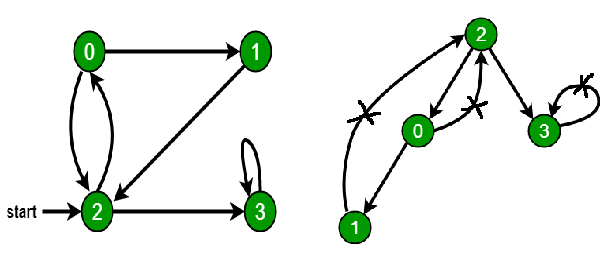

For a disconnected graph, Get the DFS forest as output. To detect cycle, check for a cycle in individual trees by checking back edges.
To detect a back edge, keep track of vertices currently in the recursion stack of function for DFS traversal. If a vertex is reached that is already in the recursion stack, then there is a cycle in the tree. The edge that connects the current vertex to the vertex in the recursion stack is a back edge. Use recStack[] array to keep track of vertices in the recursion stack.

<b>Dry Run:</b><br>
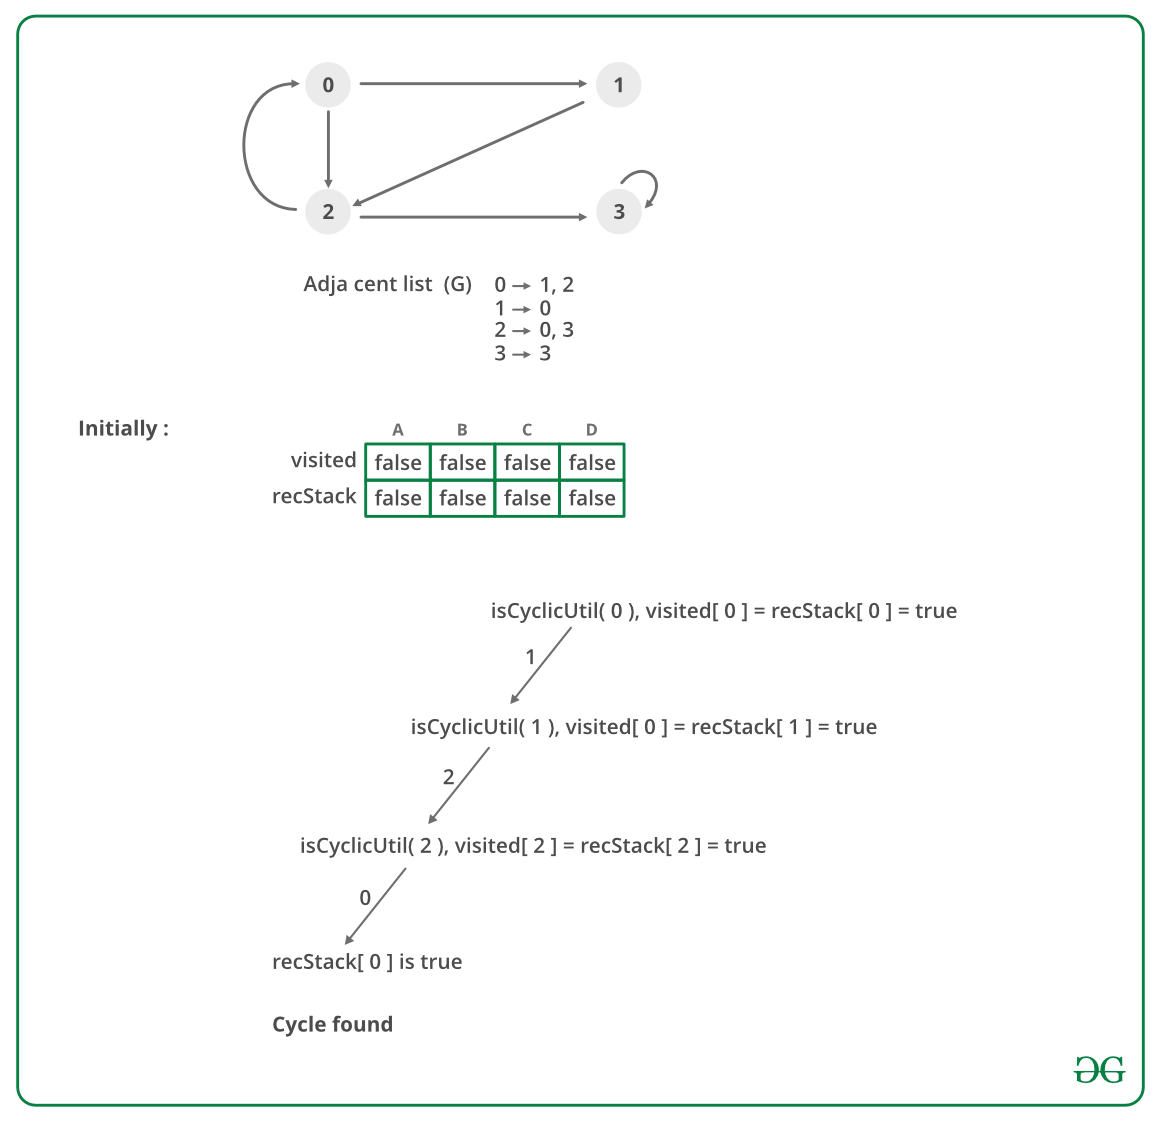

<b>Algorithm:</b><br> 
1. Create the graph using the given number of edges and vertices.
2. Create a recursive function that initializes the current index or vertex, visited, and recursion stack.
3. Mark the current node as visited and also mark the index in recursion stack.
4. Find all the vertices which are not visited and are adjacent to the current node. Recursively call the function for those vertices, If the recursive function returns true, return true.
5. If the adjacent vertices are already marked in the recursion stack then return true.
6. Create a wrapper class, that calls the recursive function for all the vertices and if any function returns true return true. Else if for all vertices the function returns false return false.

<b>Complexity Analysis:</b><br> 
Time Complexity: O(V+E). <br>
Time Complexity of this method is same as time complexity of DFS traversal which is O(V+E).<br>
Space Complexity: O(V).<br> 
To store the visited and recursion stack O(V) space is needed.

In [3]:
from collections import defaultdict

class Graph:
    def __init__(self, vertices):
        self.graph = defaultdict(list)
        self.V = vertices
    
    def addEdge(self,u,v):
        self.graph[u].append(v)
    
    def isCyclicUtil(self,v,visited,recStack):
        # Mark current node as visited and 
        # adds to recursion stack
        visited[v] = True
        recStack[v] = True
        # Recur for all neighbours
        # if any neighbour is visited and in 
        # recStack then graph is cyclic
        for neighbour in self.graph[v]:
            if visited[neighbour] == False:
                if self.isCyclicUtil(neighbour, visited, recStack) == True:
                    return True
            elif recStack[neighbour] == True:
                return True
        
        recStack[v] = False
        return False
    
    def isCyclic(self):
        visited = [False]*(self.V+1)
        recStack = [False]*(self.V+1)
        for node in range(self.V):
            if visited[node] == False:
                if self.isCyclicUtil(node,visited,recStack) == True:
                    return True
        
        return False

In [4]:
g = Graph(4)
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 2)
g.addEdge(2, 0)
g.addEdge(2, 3)
g.addEdge(3, 3)
if g.isCyclic() == 1:
    print("Graph has a cycle")
else:
    print("Graph has no cycle")

Graph has a cycle
